# The Track Collection

Tracks in ATLAS are straight forward - you apply the cuts on your own (or they are done by a derivation). As a result, tracks are simple objects. Note that tracks are hefty objects - a lot of their data is slimmed out, so you'll get AUX errors when you try to request it!

In [1]:
from func_adl_servicex_xaodr21 import SXDSAtlasxAODR21
import matplotlib.pyplot as plt
from config import ds
import awkward as ak
import numpy as np

Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.


Fetch all the inner detector tracks and plot their $p_T$ and the radius of the first hit on the tracks.

In [10]:
tracks = (ds
        .SelectMany(lambda e: e.TrackParticles("InDetTrackParticles"))
        .Select(lambda t: 
        {
                "pt": t.pt() / 1000.0,
        })
        .AsAwkwardArray()
        .value())

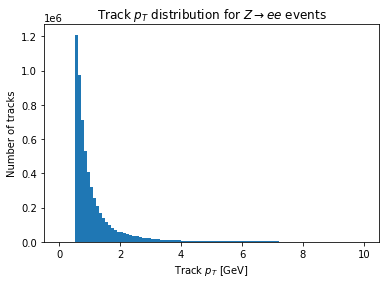

In [11]:
plt.hist(tracks.pt, bins=100, range=(0, 10))
plt.xlabel('Track $p_T$ [GeV]')
plt.ylabel('Number of tracks')
_ = plt.title('Track $p_T$ distribution for $Z\\rightarrow ee$ events')

## The Datamodel

The data model when this documentation was last built was:

In [8]:
from func_adl_servicex_xaodr21.xAOD.trackparticle_v1 import TrackParticle_v1
help(TrackParticle_v1)

Help on class TrackParticle_v1 in module func_adl_servicex_xaodr21.xAOD.trackparticle_v1:

class TrackParticle_v1(builtins.object)
 |  A class
 |  
 |  Methods defined here:
 |  
 |  TrackParticle_v1(self) -> 'func_adl_servicex_xaodr21.xAOD.trackparticle_v1.TrackParticle_v1'
 |      A method
 |  
 |  beamlineTiltX(self) -> 'float'
 |      A method
 |  
 |  beamlineTiltY(self) -> 'float'
 |      A method
 |  
 |  charge(self) -> 'float'
 |      A method
 |  
 |  chiSquared(self) -> 'float'
 |      A method
 |  
 |  clearDecorations(self) -> 'bool'
 |      A method
 |  
 |  d0(self) -> 'float'
 |      A method
 |  
 |  definingParametersCovMatrixVec(self) -> 'func_adl_servicex_xaodr21.vector_float_.vector_float_'
 |      A method
 |  
 |  e(self) -> 'float'
 |      A method
 |  
 |  eta(self) -> 'float'
 |      A method
 |  
 |  hasNonConstStore(self) -> 'bool'
 |      A method
 |  
 |  hasStore(self) -> 'bool'
 |      A method
 |  
 |  hitPattern(self) -> 'int'
 |      A method
 |  
 | 

## Further Information

* The [`xAOD::TrackParticle_v1` C++ header file](https://gitlab.cern.ch/atlas/athena/-/blob/21.2/Event/xAOD/xAODTracking/xAODTracking/versions/TrackParticle_v1.h) with all the inline documentation.
* The [Tracking CP group R21 recommendation pages](https://twiki.cern.ch/twiki/bin/view/AtlasProtected/TrackingCPRecsEarly2018#Track_Selection) on the ATLAS TWiki